# new singleton-data with entity: what are the entity types?

In [1]:
datafile="Data/singleton_data_entity.tab"
f=open(datafile,'r').read().split('\n')
entity=[]
data=[]
for line in f[1:]:
    if line!='':   
        l=line.split(',')
        data.append(l) 
        #entity.append(l[3])

In [2]:
def smr(alist):
    print "len:",len(alist)
    print "head:",alist[:10]
    print "tail:",alist[-10:]

In [3]:
import re
def get_num_features(line):
    pat='([a-z]+,\d+,\d+,\d+,\d+,\d+,)+'
    match=re.search(pat,line)
    if match:
        return match.start()

In [24]:
entity=[]
num_data=[]
for line in data:
    lstr=",".join(line)
    index=get_num_features(lstr)
    num_data.append(lstr[index:].split(',')[1:])
    ent=lstr[index:].split(',')[0]
    entity.append(ent)

In [25]:
smr(num_data)

len: 350846
head: [['1', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.0909090909091', '0.00163132137031', '1\r'], ['2', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0.181818181818', '0.00326264274062', '1\r'], ['1', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.363636363636', '0.00652528548124', '0\r'], ['2', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.636363636364', '0.0114192495922', '1\r'], ['1', '4', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0.909090909091', '0.0163132137031', '1\r'], ['3', '3', '2', '0', '0', '0', '0', '0', '1', '0', '0', '1.0', '0.0179445350734', '0\r'], ['1', '3', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1.0', '0.0195758564437', '1\r'], ['1', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1.0', '0.021207177814', '1\r'], ['3', '3', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0.333333333333', '0.0228384991843', '1\r'], ['1', '3', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1.0', '0.026101141925', '0\r']]
tail: [['1', 

In [5]:
smr(entity)

len: 350846
head: ['abstract', 'event', 'place', 'person', 'place', 'person', 'person', 'time', 'place', 'organization']
tail: ['abstract', 'organization', 'person', 'person', 'organization', 'person', 'place', 'person', 'abstract', 'place']


In [6]:
entity_types=set(entity)

In [7]:
len(entity_types)

11

In [9]:
entity_types

{'abstract',
 'animal',
 'event',
 'object',
 'organization',
 'person',
 'place',
 'plant',
 'quantity',
 'substance',
 'time'}

In [10]:
smr(data)

len: 350846
head: [['Celebration', 'celebration', 'nn', 'abstract', '1', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.0909090909091', '0.00163132137031', '1\r'], ['Celebration Shooting', 'shooting', 'nsubj', 'event', '2', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0.181818181818', '0.00326264274062', '1\r'], ['Wedding', 'wedding', 'dobj', 'place', '1', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.363636363636', '0.00652528548124', '0\r'], ['a Funeral', 'funeral', 'pobj', 'person', '2', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.636363636364', '0.0114192495922', '1\r'], ['Gaza', 'gaza', 'nn', 'place', '1', '4', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0.909090909091', '0.0163132137031', '1\r'], ['Southern Gaza Strip', 'strip', 'pobj', 'person', '3', '3', '2', '0', '0', '0', '0', '0', '1', '0', '0', '1.0', '0.0179445350734', '0\r'], ['Asad', 'asad', 'root', 'person', '1', '3', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1.0', '0.0195758564437', '1

In [13]:
entity_dict={}
ent_id=0
for ent in entity_types:
    entity_dict[ent]=ent_id
    ent_id+=1
    

    

In [14]:
entity_dict


{'abstract': 2,
 'animal': 6,
 'event': 9,
 'object': 3,
 'organization': 8,
 'person': 4,
 'place': 5,
 'plant': 0,
 'quantity': 10,
 'substance': 1,
 'time': 7}

In [31]:
import numpy as np
ent_vector=np.zeros(len(entity_types), dtype=str)

In [32]:
ent_vector

array(['', '', '', '', '', '', '', '', '', '', ''], 
      dtype='|S1')

In [22]:
ent_vector[entity_dict['abstract']]=1

In [28]:
list(ent_vector)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
list(ent_vector)+num_data[0]

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 '4',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0.0909090909091',
 '0.00163132137031',
 '1\r']

In [48]:
for k in entity_types:
    print k

plant
substance
abstract
object
person
place
animal
time
organization
event
quantity


In [49]:
import datetime

now = datetime.datetime.now()
print "Current date and time using isoformat:"
print now.isoformat()

Current date and time using isoformat:
2016-10-21T11:14:53.584600


{'boxes': [<matplotlib.lines.Line2D at 0x108836a90>],
 'caps': [<matplotlib.lines.Line2D at 0x1088d2650>,
 'fliers': [<matplotlib.lines.Line2D at 0x1088c97d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10884ebd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x108836710>,
  <matplotlib.lines.Line2D at 0x108836d10>]}

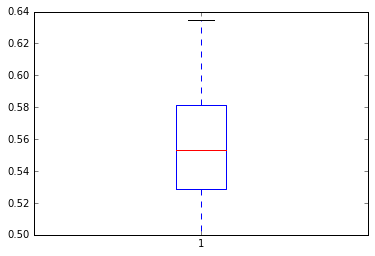

In [95]:
plt.boxplot(probs)

In [106]:
10 ** np.random.uniform(-6, 1)

8.317725288942391e-05

In [70]:
h

[5, 6, 8, 7, 9]